<a href="https://colab.research.google.com/github/akritidu/Multi-label-Classification-in-the-Home-Improvement/blob/main/Machine_learning__algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
"/content/drive/MyDrive/Dataset/HMDataset.csv"

'/content/drive/MyDrive/Dataset/Thesis_Dataset.csv'

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/HMDataset.csv")
df.head()

,id,contexts,categories
0,1,!Hi - this junction box was covered with a plu...,"['electrical', 'wiring']"
1,2,"""High efficiency"" & condensing boilers or furn...","['hvac', 'appliances', 'interior-maintenance']"
2,3,"""We moved the microwave to a different spot in...","['electrical', 'wiring']"
3,4,(An update is below the pictures.)We just move...,"['plumbing', 'hvac']"
4,5,(Apologies in advance folks - I'm new to compr...,"['plumbing', 'materials', 'appliances']"


In [ ]:
df.drop(['id'],axis=1,inplace=True)


In [ ]:
df['contexts'][10]

'(I am a new homeowner.)I went to replace a some fluorescent tubes that looked like they burned out, but after disassembling it a little to get the tubes out, I saw something a little alarming:There was a black sticky substance on the inside cover of the housing:Picture #1 of what looks like a "burned" wire and "melted" electrical tapePicture #2 of the sameCloseup of the "melted" electrical tape:So, my questions are:EDIT:The electrical tape was not melted, and the wire was not burned.  The culprit was indeed the ballast.  Here are the leaks:Thanks, lqlarry!'

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
#Lemmatize Words

def fetch_pos_tag(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        # As default pos in lemmatization is Noun
        return wordnet.NOUN

lemmatizer = WordNetLemmatizer()

In [ ]:
REPLACE_URLS = re.compile(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+')
REPLACE_HASH = re.compile(r'#(\w+)')
REPLACE_AT = re.compile(r'@(\w+)')
REPLACE_HTML_TAGS = re.compile(r'<[^>]+>')
#REPLACE_DIGITS = re.compile(r'\d+')
#REPLACE_BY = re.compile(r"[/(){}\[\]\|,;.:?\-\'\"$]")
REPLACE_BY = re.compile(r"[^a-z0-9\-]")

STOPWORDS = set(stopwords.words('english'))

#tokens_re = re.compile(r'('+'|'.join(regex)+')', re.VERBOSE | re.IGNORECASE)

# sentences = [] #for Word2Vec model

def clean_text(text):
    text = text.lower()
    text = REPLACE_HTML_TAGS.sub(' ', text)
    text = REPLACE_URLS.sub('', text)
    text = REPLACE_HASH.sub('', text)
    text = REPLACE_AT.sub('', text)
    #text = REPLACE_DIGITS.sub(' ', text)
    text = REPLACE_BY.sub(' ', text)
    
    
    text = " ".join(lemmatizer.lemmatize(word.strip(), fetch_pos_tag(pos_tag([word.strip()])[0][1])) for word in text.split() if word not in STOPWORDS and len(word)>3)
    
    #sentences.append(text.split())
    return text

In [ ]:
df['contexts'] = df['contexts'].apply(clean_text)

In [ ]:
df['contexts'][10]

'homeowner go replace fluorescent tube look like burn disassemble little tube something little alarm black sticky substance inside cover housing picture look like burn wire melt electrical tapepicture samecloseup melt electrical tape question edit electrical tape melt wire burn culprit indeed ballast leak thanks lqlarry'

In [ ]:
import ast
ast.literal_eval(df['categories'].iloc[0])

['electrical', 'wiring']

In [ ]:
df['categories'] = df['categories'].apply(lambda x: ast.literal_eval(x))
df.head()

,contexts,categories
0,junction cover plug cover opening blank cover ...,"[electrical, wiring]"
1,high efficiency condense boiler furnace produc...,"[hvac, appliances, interior-maintenance]"
2,move microwave different spot kitchen realize ...,"[electrical, wiring]"
3,update picture move house november dishwasher ...,"[plumbing, hvac]"
4,apology advance folk compression connection su...,"[plumbing, materials, appliances]"


In [ ]:
y = df['categories']
y

0                            [electrical, wiring]
1        [hvac, appliances, interior-maintenance]
2                            [electrical, wiring]
3                                [plumbing, hvac]
4               [plumbing, materials, appliances]
                           ...                   
21214                                  [lighting]
21215                           [walls-drywallls]
21216                            [hardware-tools]
21217    [electrical, hvac, interior-maintenance]
21218                                  [lighting]
Name: categories, Length: 21219, dtype: object

In [ ]:
multilabel = MultiLabelBinarizer()
y = multilabel.fit_transform(df['categories'])
y

array([[0, 1, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y.shape[1]

13

In [ ]:
multilabel.classes_

array(['appliances', 'electrical', 'exterior-maintenance',
       'hardware-tools', 'hvac', 'insulation', 'interior-maintenance',
       'lighting', 'materials', 'plumbing', 'safety', 'walls-drywallls',
       'wiring'], dtype=object)

In [ ]:
pd.DataFrame(y, columns=multilabel.classes_)

,appliances,electrical,exterior-maintenance,hardware-tools,hvac,insulation,interior-maintenance,lighting,materials,plumbing,safety,walls-drywallls,wiring
0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21214,0,0,0,0,0,0,0,1,0,0,0,0,0
21215,0,0,0,0,0,0,0,0,0,0,0,1,0
21216,0,0,0,1,0,0,0,0,0,0,0,0,0
21217,0,1,0,0,1,0,1,0,0,0,0,0,0


In [ ]:
tfidf = TfidfVectorizer(analyzer='word', max_features=10000, ngram_range=(1,3), stop_words='english')
X = tfidf.fit_transform(df['contexts'])
X.shape, y.shape

((21219, 10000), (21219, 13))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve, auc, roc_auc_score
classifier = OneVsRestClassifier(LinearSVC())
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print('AUC score: {}'.format(roc_auc_score(y_test,predictions)))

AUC score: 0.7959264216586612


In [ ]:
X = ['What is this electrical cable?']
xt = tfidf.transform(X)
classifier.predict(xt)


array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [ ]:
multilabel.inverse_transform(classifier.predict(xt))

[('electrical', 'wiring')]

In [ ]:
X = ['How tight can I tighten triangular plastic nuts on a toilet base']
xt = tfidf.transform(X)
classifier.predict(xt)
multilabel.inverse_transform(classifier.predict(xt))

[('hardware-tools', 'plumbing')]

In [ ]:
X = ['Is it normal for a connection piece at outdoor HVAC unit to sweat heavily?']
xt = tfidf.transform(X)
classifier.predict(xt)
multilabel.inverse_transform(classifier.predict(xt))


[('hvac',)]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score

from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier

In [ ]:

y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [ ]:
n_classes = y.shape[1]

In [ ]:

import matplotlib
matplotlib.rc('figure', figsize=(15, 7))

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  import sys


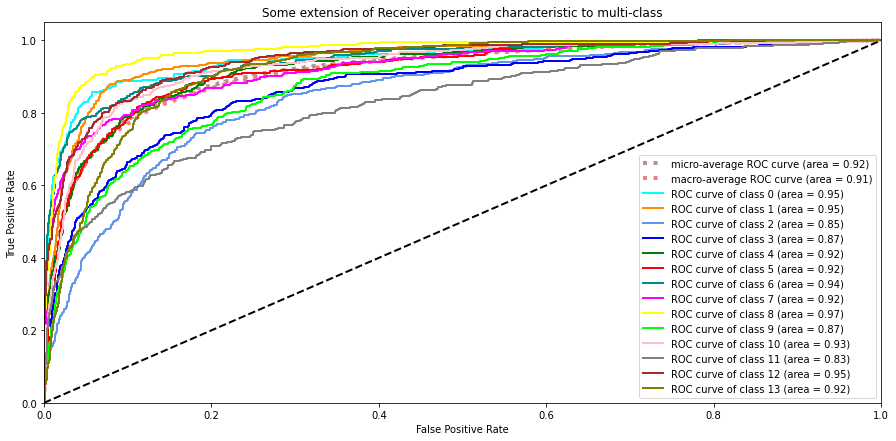

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
lw = 2
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='rosybrown', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='lightcoral', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'blue', 'green', 'red', 'darkcyan', 'magenta', 'yellow', 'lime', 'pink', 'gray', 'brown', 'olive'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import hamming_loss
